# In this analysis of a car manufacturer's dataset obtained from Kaggle, predictive analytics was employed to estimate the acceleration of cars using a linear regression model. However, the model encountered issues of overfitting, leading to unsatisfactory test scores. To address this problem, I have applied regularization techniques, specifically L1 and L2 regularization, as appropriate, in an attempt to rectify the overfitting and improve the model's performance.

# The test scores are not very high for this model to actually be applied for prediction. However, the aim is not to get this accepted but to show how Ridge regression/L2 regularization can help to solve the problem of overfitting resulting from Multicollinearity

# Attribute Information:

mpg: continuous

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

origin: multi-valued discrete

car name: string (unique for each instance)

# Importing required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#To make all rows visible
pd.options.display.max_rows=9999

In [3]:
df= pd.read_csv("auto.csv")

In [4]:
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0        8.0         307.0        130  3504.0          12.0          70   
1  15.0        8.0         350.0        165  3693.0          11.5          70   
2  18.0        8.0         318.0        150  3436.0          11.0          70   
3  16.0        8.0         304.0        150  3433.0          12.0          70   
4  17.0        8.0         302.0        140  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# Getting to know the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           390 non-null    float64
 1   cylinders     388 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        389 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


In [6]:
df.isna().sum()

mpg              8
cylinders       10
displacement     0
horsepower       0
weight           9
acceleration     0
model year       0
origin           0
car name         0
dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,390.000000,388.000000,398.000000,389.000000,398.000000,398.000000,398.000000
mean,23.422308,5.451031,193.425879,2970.758355,15.568090,76.010050,1.572864
std,7.810229,1.699726,104.269838,843.556721,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.125000,4.000000,104.250000,2226.000000,13.825000,73.000000,1.000000
50%,22.750000,4.000000,148.500000,2807.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3605.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.shape

(398, 9)

In [9]:
df.dtypes



mpg             float64
cylinders       float64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Exploratory data analytics(EDA)

# Changing data types into workable dtypes

horsepower column has object dtype as well as some blank values as ?, first replace those blank values from blank numeric values
tHen turn it into float, cuz, u can direct transfer column with missing values to integer, then fill it with whatever and then change the type to integer.

In [10]:
df["horsepower"]= df["horsepower"].replace("?",np.nan)

In [11]:
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0        8.0         307.0        130  3504.0          12.0   
1    15.0        8.0         350.0        165  3693.0          11.5   
2    18.0        8.0         318.0        150  3436.0          11.0   
3    16.0        8.0         304.0        150  3433.0          12.0   
4    17.0        8.0         302.0        140  3449.0          10.5   
5    15.0        8.0         429.0        198  4341.0          10.0   
6    14.0        8.0         454.0        220     NaN           9.0   
7    14.0        8.0         440.0        215  4312.0           8.5   
8    14.0        8.0         455.0        225  4425.0          10.0   
9    15.0        8.0         390.0        190  3850.0           8.5   
10   15.0        8.0         383.0        170  3563.0          10.0   
11   14.0        8.0         340.0        160  3609.0           8.0   
12   15.0        8.0         400.0        150  3761.0           9.5   
13   1

In [12]:
df["horsepower"]= df["horsepower"].astype(float)

In [13]:
df["horsepower"]=df["horsepower"].fillna(df["horsepower"].mean())

In [14]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Addressing missing values


In [15]:
df.isna().sum()

mpg              8
cylinders       10
displacement     0
horsepower       0
weight           9
acceleration     0
model year       0
origin           0
car name         0
dtype: int64

In [16]:
#Threshold for dropping
threshold_drop= len(df)*0.5
print(threshold_drop)

199.0


In [17]:
columns_to_drop= df.columns[df.isna().sum()<= threshold_drop]

In [18]:
print(columns_to_drop)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [19]:
len_miss= df.isna().sum().sum()
print(len_miss)

27


In [20]:
Threshold_to_drop= len(df)*0.05
print(Threshold_to_drop)

19.900000000000002


In [21]:
if len_miss <= Threshold_to_drop:
    print("You can drop the missing values")
else:
    print("You can't drop the missing values")

You can't drop the missing values


In [22]:
df.isna().any()

mpg              True
cylinders        True
displacement    False
horsepower      False
weight           True
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [23]:
df['cylinders'].fillna(df['cylinders'].quantile(0.75),inplace=True)

In [24]:
df["weight"].fillna(df["weight"].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Here, we dont have to fill the missing values on the column 'mpg' because we are dropping that column anyway.

In [26]:
df.dtypes


mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Checking for outliers

<Axes: xlabel='horsepower'>

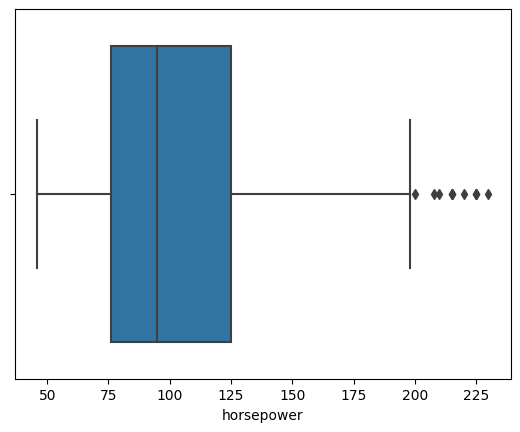

In [27]:
sns.boxplot(data=df, x= 'horsepower')

<Axes: xlabel='cylinders'>

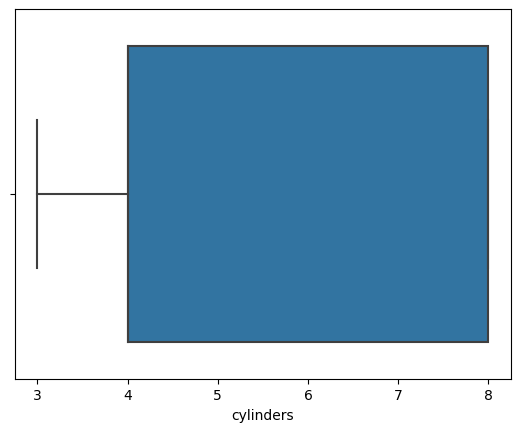

In [28]:
sns.boxplot(data=df, x= 'cylinders')

<Axes: xlabel='displacement'>

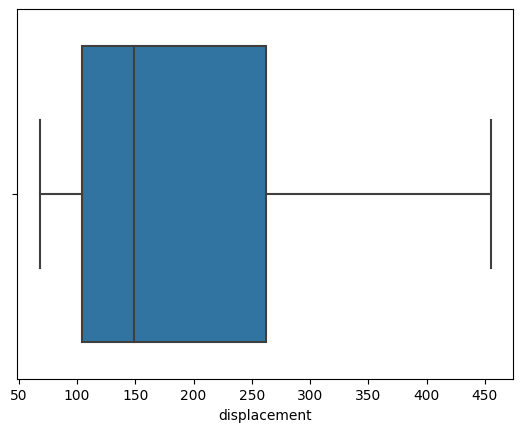

In [29]:
sns.boxplot(data=df, x= 'displacement')

<Axes: xlabel='weight'>

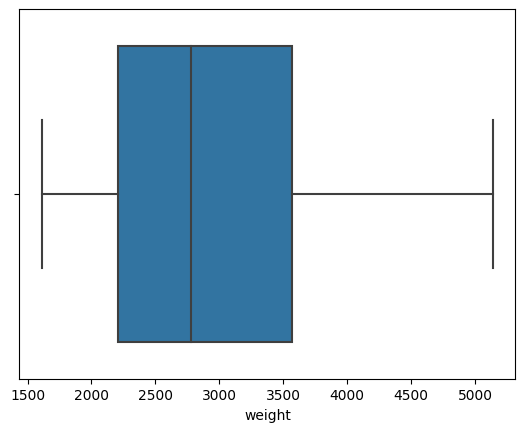

In [30]:
sns.boxplot(data=df, x= 'weight')

<Axes: xlabel='acceleration'>

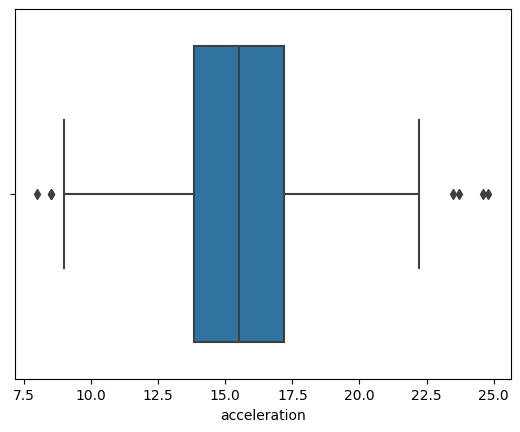

In [35]:
sns.boxplot(data=df, x= 'acceleration') 

The variables do not have a large amount of outliers. Therefore, we can move forward without removing the outliers. Also, this dataset is quite small in size if we consider thenumber of records. Removing the distant values might affect the validity score of our train data.
If there were significant amount of outliers, we would used the Inter-Quartile range method to get rid of them.

# Visualizing relationships between the variables

Text(0.5, 1.0, 'Correlation heatmap')

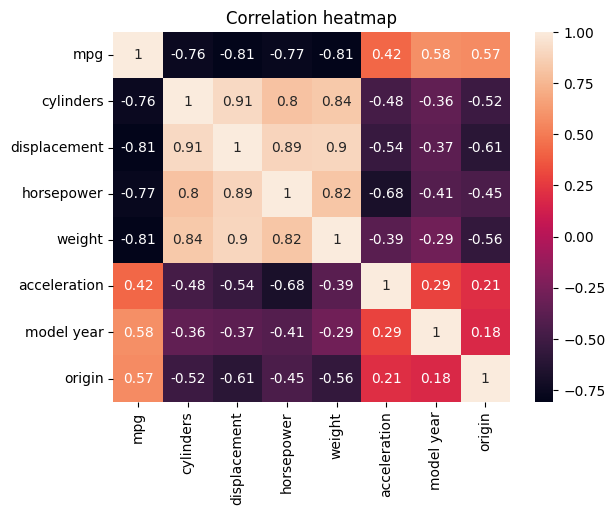

In [36]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation heatmap")

Text(0.5, 1.0, 'Relationship between Displacement and weight')

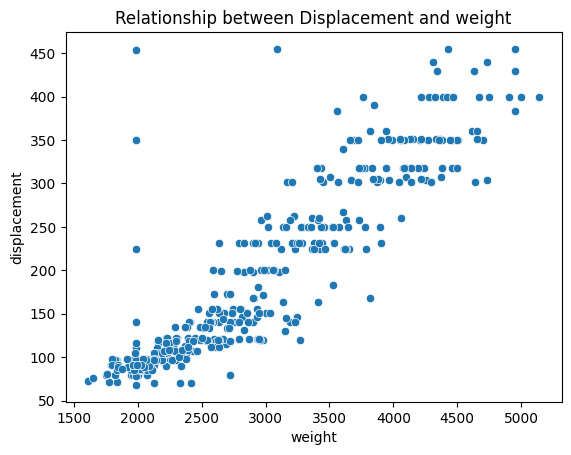

In [37]:
sns.scatterplot(data=df, x="weight",y="displacement")
plt.title("Relationship between Displacement and weight")

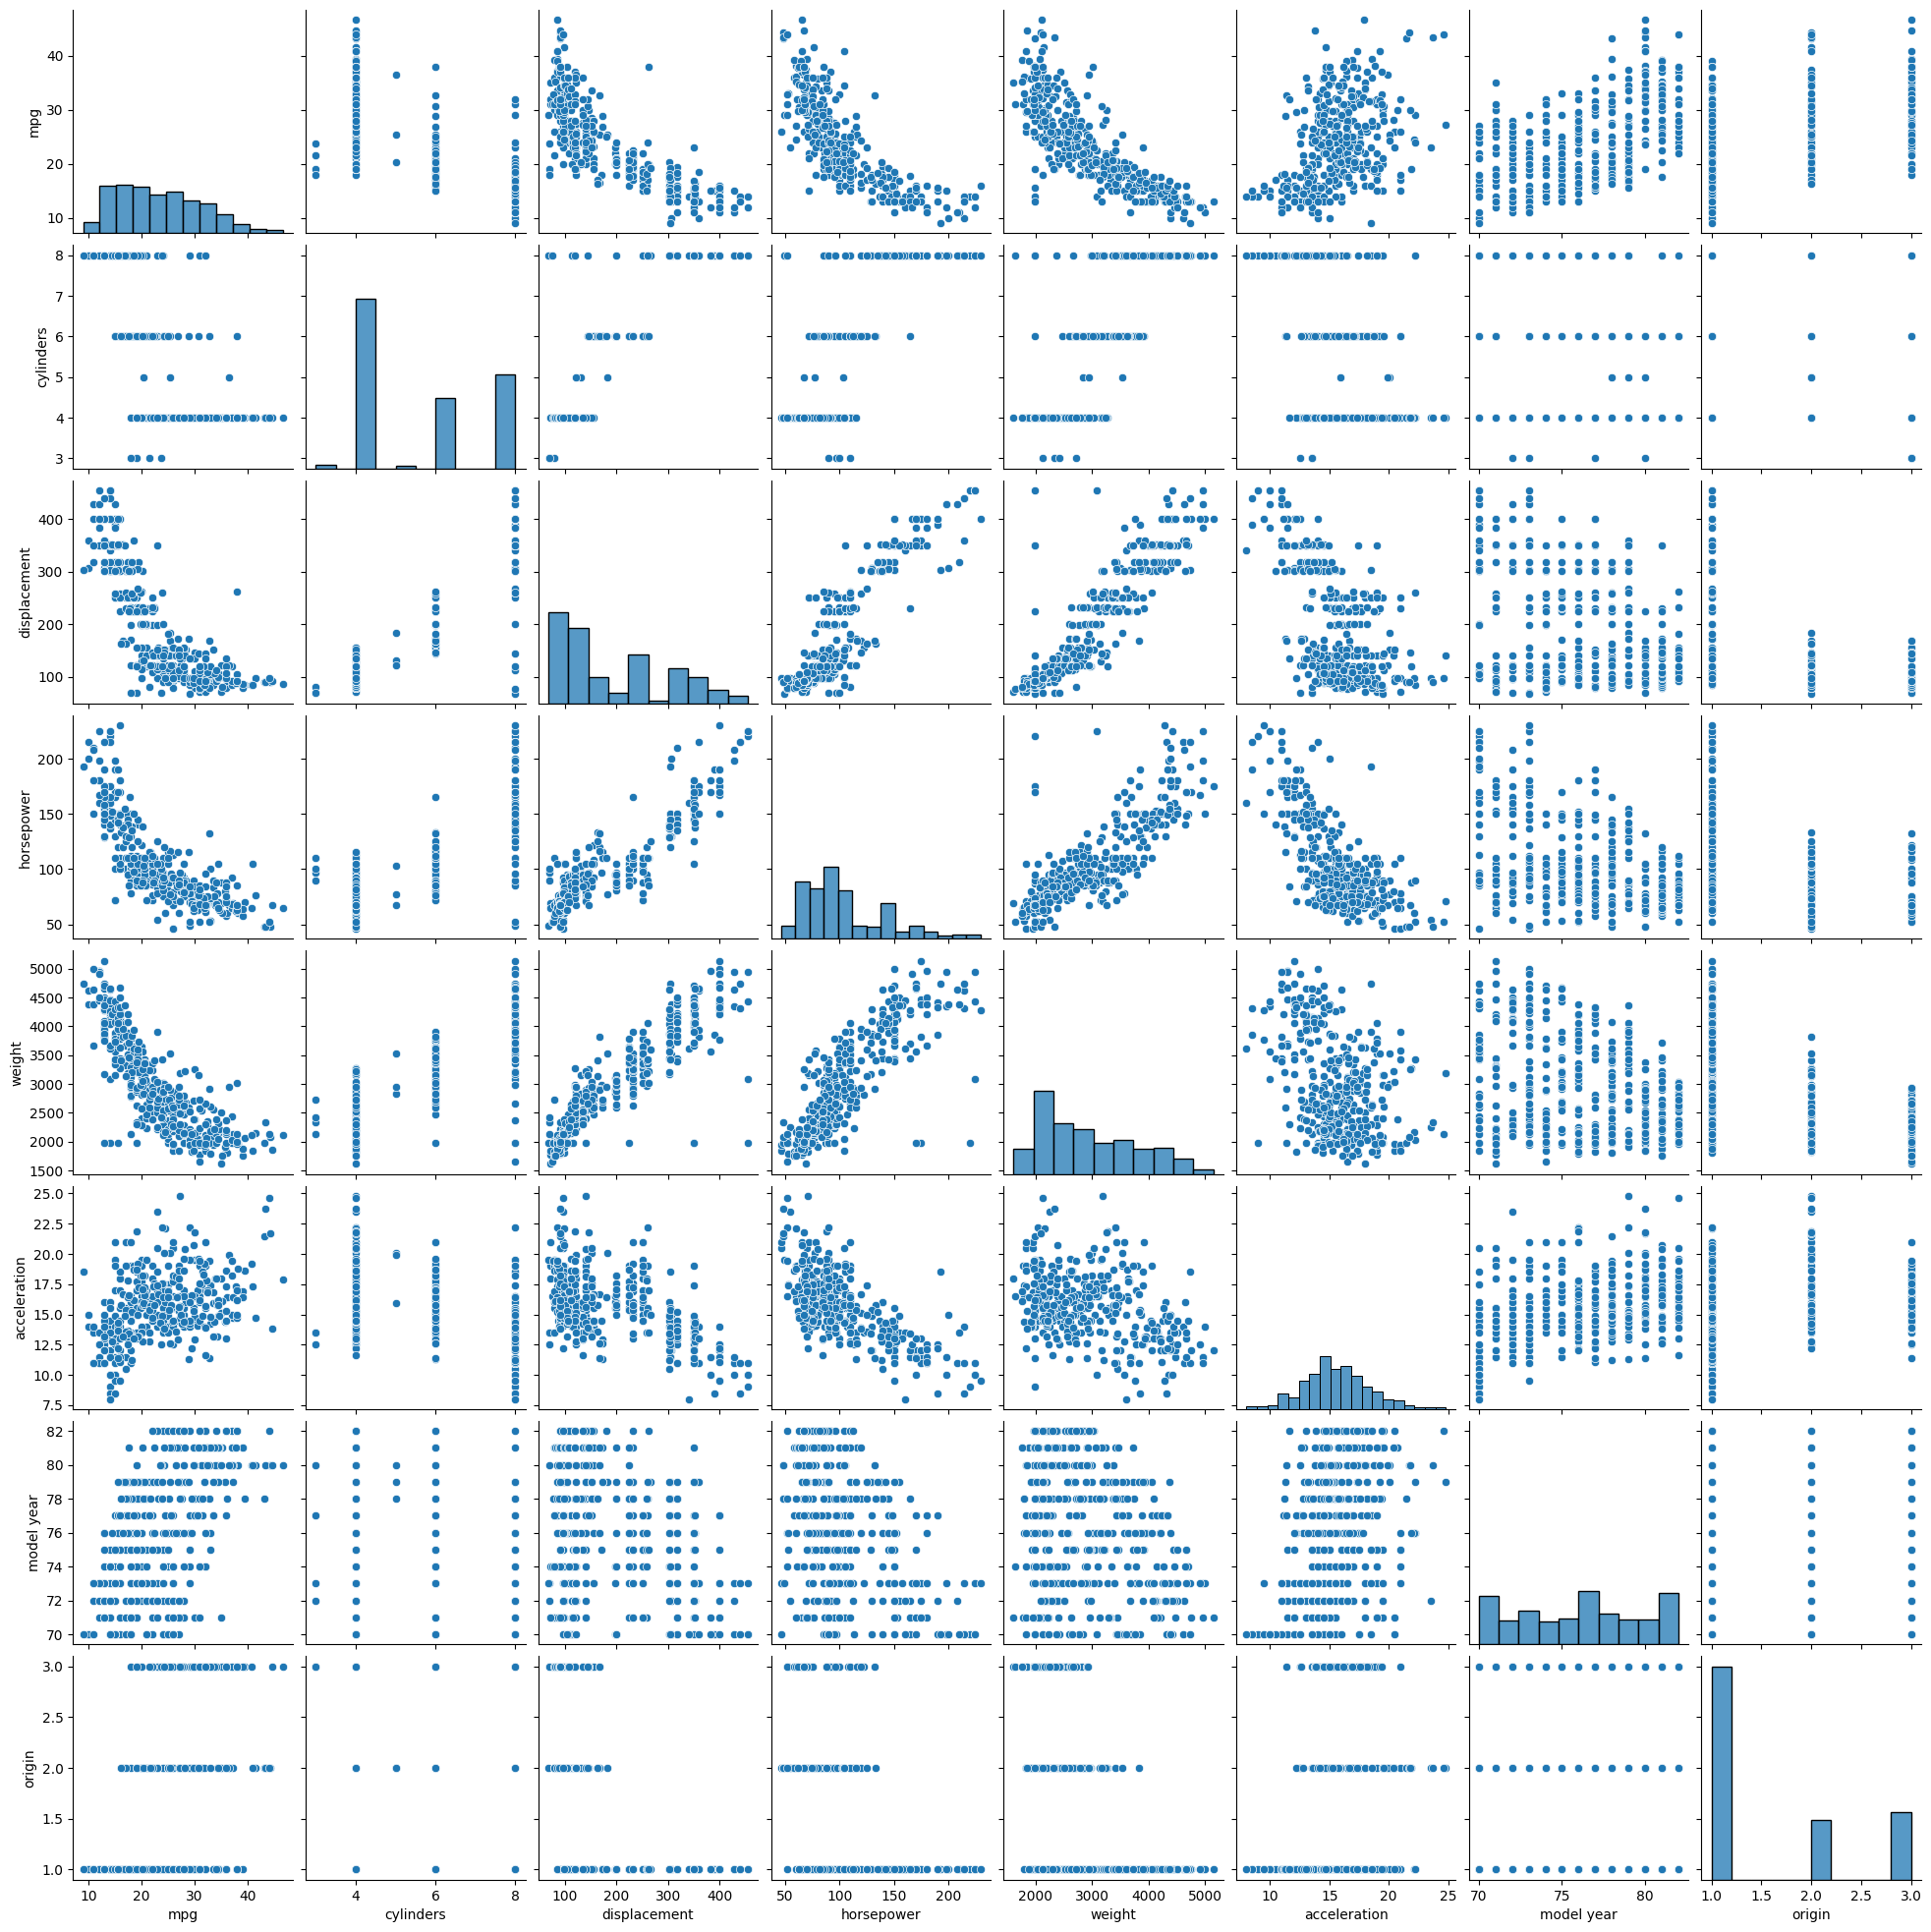

In [38]:
sns.pairplot(data=df)

# Factor relationships and distributions

Text(0, 0.5, 'Count')

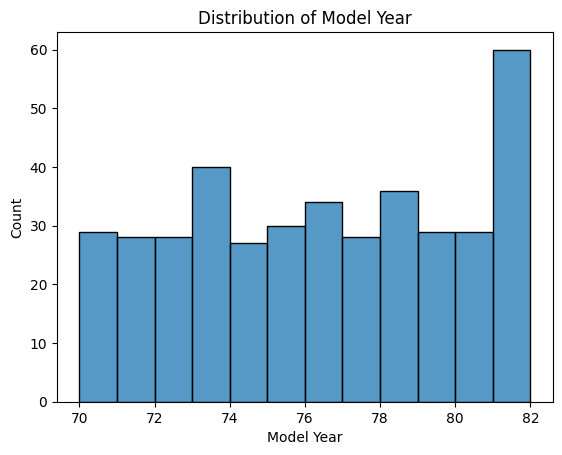

In [39]:
sns.histplot(data=df, x= 'model year', binwidth=1)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

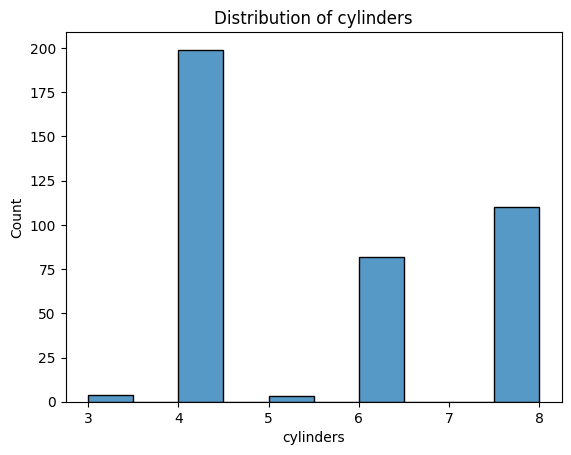

In [40]:
sns.histplot(data=df, x= 'cylinders', binwidth=0.5)
plt.title('Distribution of cylinders')
plt.xlabel('cylinders')
plt.ylabel('Count')

In [41]:
#Kernel density estimate

Text(0.5, 1.0, 'Kernel density estimate of horsepower and displacement')

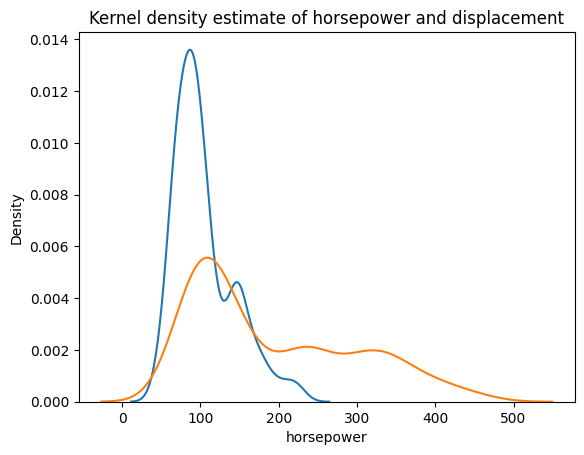

In [42]:
sns.kdeplot(data=df, x='horsepower')
sns.kdeplot(data=df, x='displacement')
plt.title('Kernel density estimate of horsepower and displacement')


Text(0.5, 1.0, 'Kernel density estimate of weight')

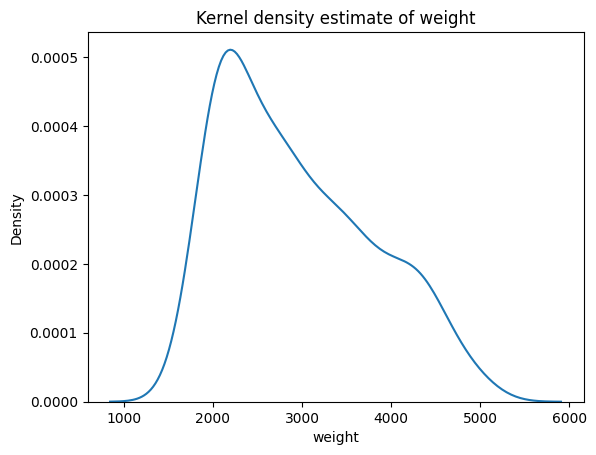

In [43]:
sns.kdeplot(data=df, x='weight')
plt.title('Kernel density estimate of weight')

Text(0.5, 1.0, 'Kernel density estimate of cylinders and acceleration')

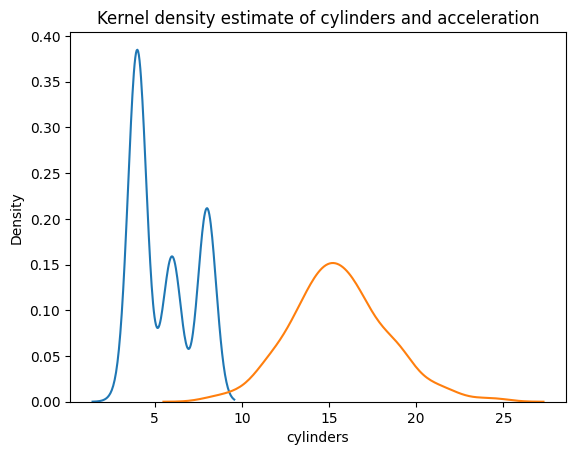

In [44]:
sns.kdeplot(data=df, x='cylinders')
sns.kdeplot(data=df, x='acceleration')
plt.title('Kernel density estimate of cylinders and acceleration')

# Segregating dependent and independent variables

In [45]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [46]:
X= df.drop(['mpg','acceleration','model year','origin','car name'], axis=1)
Y= df['acceleration']

In [47]:
print(X)

     cylinders  displacement  horsepower  weight
0          8.0         307.0  130.000000  3504.0
1          8.0         350.0  165.000000  3693.0
2          8.0         318.0  150.000000  3436.0
3          8.0         304.0  150.000000  3433.0
4          8.0         302.0  140.000000  3449.0
5          8.0         429.0  198.000000  4341.0
6          8.0         454.0  220.000000  1985.0
7          8.0         440.0  215.000000  4312.0
8          8.0         455.0  225.000000  4425.0
9          8.0         390.0  190.000000  3850.0
10         8.0         383.0  170.000000  3563.0
11         8.0         340.0  160.000000  3609.0
12         8.0         400.0  150.000000  3761.0
13         8.0         455.0  225.000000  3086.0
14         8.0         113.0   95.000000  2372.0
15         6.0         198.0   95.000000  2833.0
16         6.0         199.0   97.000000  2774.0
17         6.0         200.0   85.000000  2587.0
18         4.0          97.0   88.000000  2130.0
19         4.0      

# Checking for Multicollinearity between the features

Text(0.5, 1.0, 'Multicollinearity between the features')

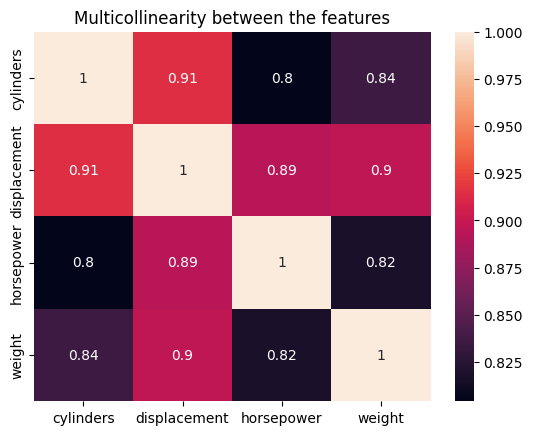

In [48]:
sns.heatmap(X.corr(),annot=True)
plt.title('Multicollinearity between the features')

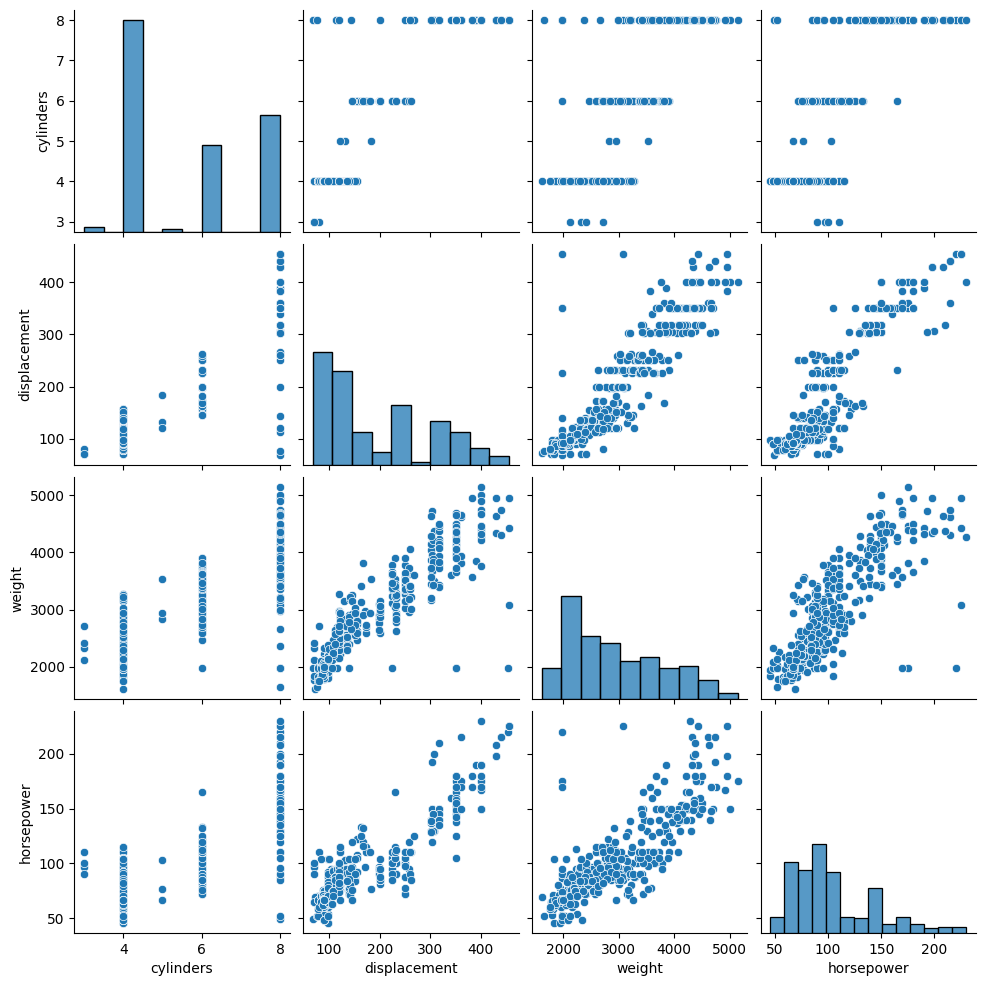

In [49]:
sns.pairplot(data=df,vars= ["cylinders","displacement","weight","horsepower"])


# Significant Multicollinearity can be observed between the features through the above heatmap and pairplot. This might be the reason for the overfitting issue that we will be addressing further

In [50]:
print(Y)

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
5      10.0
6       9.0
7       8.5
8      10.0
9       8.5
10     10.0
11      8.0
12      9.5
13     10.0
14     15.0
15     15.5
16     15.5
17     16.0
18     14.5
19     20.5
20     17.5
21     14.5
22     17.5
23     12.5
24     15.0
25     14.0
26     15.0
27     13.5
28     18.5
29     14.5
30     15.5
31     14.0
32     19.0
33     13.0
34     15.5
35     15.5
36     15.5
37     15.5
38     12.0
39     11.5
40     13.5
41     13.0
42     11.5
43     12.0
44     12.0
45     13.5
46     19.0
47     15.0
48     14.5
49     14.0
50     14.0
51     19.5
52     14.5
53     19.0
54     18.0
55     19.0
56     20.5
57     15.5
58     17.0
59     23.5
60     19.5
61     16.5
62     12.0
63     12.0
64     13.5
65     13.0
66     11.5
67     11.0
68     13.5
69     13.5
70     12.5
71     13.5
72     12.5
73     14.0
74     16.0
75     14.0
76     14.5
77     18.0
78     19.5
79     18.0
80     16.0
81     17.0
82     14.5
83  

# Splitting the data into train and test data

In [51]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(398, 4) (318, 4) (80, 4)


# Linear regression model

Model training

In [53]:

model=LinearRegression()

In [54]:
model.fit(X_train,Y_train)

LinearRegression()

In [55]:
# Checking accuracy of train data


In [56]:
X_train_pred= model.predict(X_train)

In [57]:
train_mse = mean_squared_error(Y_train, X_train_pred)

In [58]:
print(train_mse)

3.2093916993145983


In [59]:
train_r2 = r2_score(Y_train, X_train_pred)

In [60]:
print(train_r2)

0.5826683007245467


# Linear regression prediction

In [62]:
accel_pred= {
    'cylinders' : 10.0,
    'displacement': 300.0,
    'horsepower' : 200.0,
    'weight':4000.0
}

In [63]:
accel_pred= pd.DataFrame([accel_pred])

In [64]:
linear_pred= model.predict(accel_pred)

In [65]:
print(linear_pred)

[9.35484977]


In [66]:
# Checking accuracy of test data

In [67]:
X_test_pred= model.predict(X_test)

In [68]:
test_mse = mean_squared_error(Y_test, X_test_pred)

In [69]:
print(test_mse)

3.8604641271261713


In [70]:
test_r2 = r2_score(Y_test, X_test_pred)

In [71]:
print(test_r2)

0.4570897714991127


# At the R2 test score of 45.70%, the linear regression model is predicting an acceleration of 9.35 m/s

# Visualizing regression line (test data)

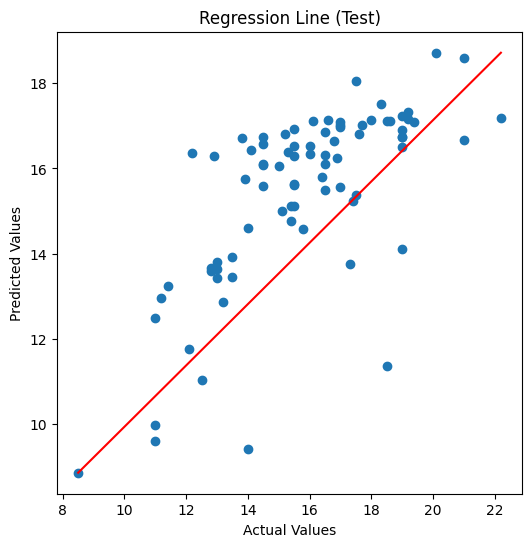

In [75]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, X_test_pred)
plt.plot([min(Y_test), max(Y_test)], [min(X_test_pred), max(X_test_pred)],color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line (Test)')
plt.show()

# Visualizing regression (train)

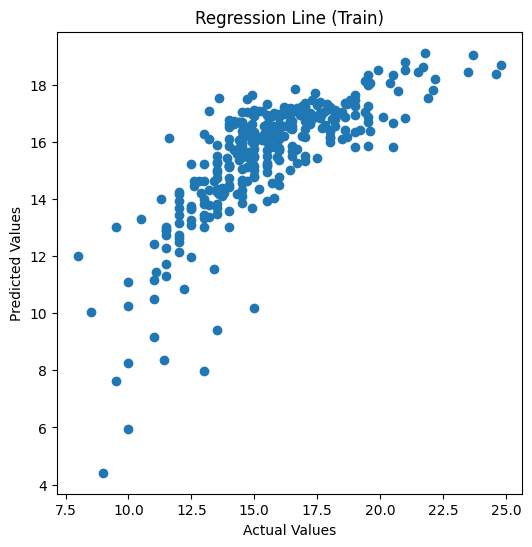

In [78]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_train, X_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line (Train)')
plt.show()

# The R2 score of test data is significantly smaller than that of Train data. This depicts a classic symptom of OVERFITTING problem in the Model

# Moving forward with L2 Regularization(Ridge regression method)

In [221]:
from sklearn.linear_model import Ridge


In [222]:
model2= Ridge(alpha=1000, max_iter=100, tol= 0.1)

In [223]:
model2.fit(X_train, Y_train)

Ridge(alpha=1000, max_iter=100, tol=0.1)

In [224]:
model2.score(X_train,Y_train)

0.5821705654913615

In [225]:
model2.score(X_test,Y_test)

0.4597064501817145

# Ridge regression prediction

In [227]:
ridge_pred= model2.predict(accel_pred)

In [228]:
print(ridge_pred)

[9.65461555]


In [229]:
print(ridge_pred-linear_pred)

[0.29976577]


# At the improved R2 test score of 45.970%, the Ridge regression model is predicting an acceleration of 9.65 m/s. Therefore, using the L2 Regularization/Ridge regression, the car is predicted to have an improved acceleration of 0.299m/s

# L1 Regularization(Lasso regression method)

In [230]:
from sklearn.linear_model import Lasso

In [231]:
model1= Lasso(alpha=1000, max_iter=100, tol= 0.1)

In [232]:
model1.fit(X_train, Y_train)

Lasso(alpha=1000, max_iter=100, tol=0.1)

In [233]:
model1.score(X_train,Y_train)

0.0

In [234]:
model1.score(X_test,Y_test)

-0.010484527330106852

# Lasso regression prediction

In [236]:
lasso_pred= model1.predict(accel_pred)

In [237]:
print(lasso_pred)

[15.51320755]


# Lasso Regression gave a disastrous Test score result. Therefore, Ridge Regression is the better Model for this dataset

Source of dataset: 

https://www.kaggle.com/datasets/uciml/autompg-dataset